In [1]:
import torch
import torchvision
import torchvision.models as models
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from pprint import pprint

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [3]:
from networks.networks import ExampleNet, vgg11, extract_layer_names
from solver import Solver, load_solver
import data_visualization
import data_loader

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

Files already downloaded and verified
Files already downloaded and verified


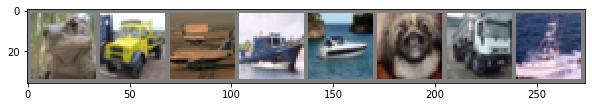

      frog    truck    plane     ship     ship      dog    truck     ship


In [4]:
batch_size = 64
subset_size = 1000
random_labels = False
#trainloader = data_loader.get_CIFAR10_trainset_loader(batch_size=4, subset_indices=subset_indices)

trainloader = data_loader.get_CIFAR10_trainset_loader(batch_size=batch_size, subset_size=subset_size, random_labels=random_labels)
testloader = data_loader.get_CIFAR10_testset_loader(batch_size=batch_size, subset_size=subset_size)

classes = data_loader.get_CIFAR10_classes()

data_visualization.show_samples(trainloader, classes)

In [5]:
net = ExampleNet()
# net = models.vgg16(pretrained=False)
# net = vgg11()
# testloader=None
solver = Solver(net, trainloader=trainloader, validationloader=testloader, optim = 'adam')

In [6]:
solver.train(num_epochs=5, log_every=4, plot=True, verbose=False)

Loading BokehJS ...

In [7]:
solver.save_solver()
solver.save_best_solver()

In [8]:
best_solver = load_solver(trainloader, testloader)
best_solver.print_bokeh_plots()

Loading BokehJS ...

Loading BokehJS ...

In [9]:
best_solver.train(num_epochs=5, plot=True, verbose=False, log_every=4)

Loading BokehJS ...

In [10]:
net = ExampleNet()
#models.vgg16(pretrained=False)

layers = extract_layer_names(net)

In [11]:
from norms import l2_norm_product
l2_norm_result = l2_norm_product(layers) 
print(l2_norm_result)

193.12167423627025
